In [46]:
import random
import torch
from d2l import torch as d2l

In [47]:
def synthetic_data(w,b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, 1000)

print("features: ", features[0], "\nlabels:", labels[0])

features:  tensor([-0.2009, -1.2253]) 
labels: tensor([7.9652])


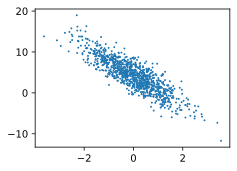

In [48]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);

In [53]:
from torch.utils import data
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))

[tensor([[-0.3809, -2.2385],
         [ 0.6262, -1.1750],
         [ 0.8464,  0.4880],
         [-0.4677,  0.5854],
         [ 0.4268, -1.3808],
         [-0.4272,  1.8838],
         [ 1.2353, -1.9368],
         [-2.0487, -0.2626],
         [ 0.4576, -0.5741],
         [ 0.3577, -0.3949]]),
 tensor([[11.0449],
         [ 9.4587],
         [ 4.2375],
         [ 1.2582],
         [ 9.7500],
         [-3.0612],
         [13.2659],
         [ 1.0156],
         [ 7.0718],
         [ 6.2546]])]

In [57]:
from torch import nn
net = nn.Sequential(nn.Linear(2, 1))

net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [71]:
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [74]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000104
epoch 2, loss 0.000104
epoch 3, loss 0.000104


In [76]:

w = net[0].weight.data
print('w的估计误差:', true_w - w.reshape(true_w.shape)) 
b = net[0].bias.data
print('b的估计误差:', true_b - b)


w的估计误差: tensor([-0.0014,  0.0006])
b的估计误差: tensor([0.0006])


In [93]:
(45)*(55) - (43)*(35)




970